In [1]:
import keras
import numpy as np
from keras.applications import vgg16

Using TensorFlow backend.


In [2]:
vgg_model = vgg16.VGG16(weights='imagenet')

In [145]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from PIL import Image
filename = 'test26.jpg'

In [146]:
orginal = load_img(filename)
x3image=load_img(filename,target_size=(672,672))
image = load_img(filename, target_size=(224, 224))



PIL image size (224, 224)


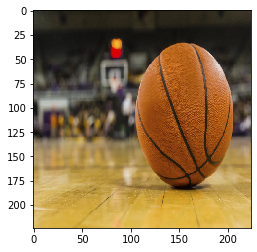

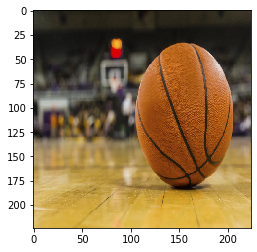

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


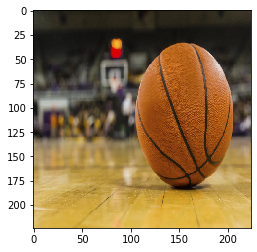

In [147]:
print('PIL image size',image.size)
plt.imshow(image)
plt.show()
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)

numpy_image = img_to_array(image)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [148]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label = decode_predictions(predictions)
print(label) 

[[('n02802426', 'basketball', 0.99945027), ('n03942813', 'ping-pong_ball', 0.00023982125), ('n07747607', 'orange', 9.614286e-05), ('n04023962', 'punching_bag', 2.2963184e-05), ('n04597913', 'wooden_spoon', 2.2235487e-05)]]


In [149]:
def clean(a):
    main_str=a[0][0][1]
    main_prob=a[0][0][2]
    return([main_str,main_prob])

In [150]:
upper=0;
lower=224;
a=[]
for i in range(3):
    right=224; 
    left=0;
    for j in range(3):
        a.append((left,upper,right,lower))
        left=left+224;
        right=right+224;        
    upper+=224
    lower+=224   

In [151]:
def predict(imae):
    numpy_imae = img_to_array(imae)
    imae_batch = np.expand_dims(numpy_imae, axis=0)
    processed_imae = vgg16.preprocess_input(imae_batch.copy())
    predictions = vgg_model.predict(processed_imae)
    label = decode_predictions(predictions)
    return(label)


In [152]:
main_pred=clean(predict(image))[0]
main_prob=clean(predict(image))[1]

In [153]:
for i in a:
    b=clean(predict(x3image.crop(i)))
    
    print(b)

['horizontal_bar', 0.09972022]
['basketball', 0.38251644]
['basketball', 0.94908583]
['parking_meter', 0.029185519]
['basketball', 0.999683]
['basketball', 0.9997434]
['black_widow', 0.06843041]
['basketball', 0.9827345]
['basketball', 0.79284525]


[[('n02802426', 'basketball', 0.9999944),
  ('n04118538', 'rugby_ball', 1.8565555e-06),
  ('n04023962', 'punching_bag', 1.0398434e-06),
  ('n04540053', 'volleyball', 9.294049e-07),
  ('n02799071', 'baseball', 7.765254e-07)]]

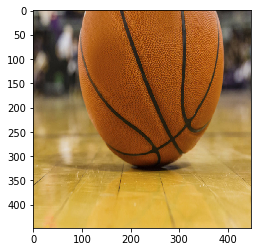

In [154]:
plt.imshow(x3image.crop((224,224,672,672)))
x3cropped=x3image.crop((224,224,672,672)).resize((224,224))
predict(x3cropped)

In [155]:

pro_image=orginal.resize(((orginal.size[0]//224)*224,(orginal.size[1]//224)*224))

In [156]:
orginal.size[0]

1200

In [158]:
pro_a=[]
upper=0
lower=pro_image.size[1]//4
while(lower<=pro_image.size[1]):
    left=0
    right=pro_image.size[0]//6
    while(right<=pro_image.size[0]):
        pro_a.append((left,upper,right,lower))
        left+=(pro_image.size[0]//3)//4
        right+=(pro_image.size[0]//3)//4
    upper+=(pro_image.size[1]//2)//4
    lower+=(pro_image.size[1]//2)//4   

In [159]:
clean(predict(pro_image.crop(pro_a[14]).resize((224,224))))

['traffic_light', 0.14672026]

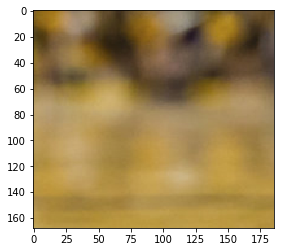

In [160]:
plt.imshow(pro_image.crop(pro_a[46]))

In [161]:
a=0
pro_data=[]
for i in pro_a:
    b=clean(predict(pro_image.crop(i).resize((224,224))))
    b.append(a)
    print(b," index ",a)
    a+=1
    pro_data.append(b)

['vine_snake', 0.027335582, 0]  index  0
['vine_snake', 0.023747308, 1]  index  1
['vine_snake', 0.014566669, 2]  index  2
['digital_clock', 0.20349707, 3]  index  3
['digital_clock', 0.16421536, 4]  index  4
['flamingo', 0.047449194, 5]  index  5
['Band_Aid', 0.3550118, 6]  index  6
['basketball', 0.70590365, 7]  index  7
['basketball', 0.6414127, 8]  index  8
['Band_Aid', 0.13378702, 9]  index  9
['chickadee', 0.025781656, 10]  index  10
['ptarmigan', 0.028414618, 11]  index  11
['water_ouzel', 0.023864672, 12]  index  12
['horizontal_bar', 0.043800868, 13]  index  13
['traffic_light', 0.14672026, 14]  index  14
['ping-pong_ball', 0.16009311, 15]  index  15
['basketball', 0.28929067, 16]  index  16
['basketball', 0.7508329, 17]  index  17
['basketball', 0.80679876, 18]  index  18
['basketball', 0.98449564, 19]  index  19
['basketball', 0.9924643, 20]  index  20
['flamingo', 0.51876223, 21]  index  21
['balance_beam', 0.051396366, 22]  index  22
['balance_beam', 0.060048457, 23]  inde

In [162]:
pro_data_ref_num=[]
for  i in pro_data:
    if(i[0]==main_pred and i[1]>=0.99):
        print(i)
        pro_data_ref_num.append(i[2])
        
    

['basketball', 0.9924643, 20]
['basketball', 0.9993339, 31]
['basketball', 0.999368, 42]
['basketball', 0.994091, 43]
['basketball', 0.99371547, 49]
['basketball', 0.990991, 52]
['basketball', 0.99721587, 53]


In [163]:
fle=[]
fri=[]
flo=[]
fup=[]
for i in pro_data_ref_num:
    print(pro_a[i])
    fle.append(pro_a[i][0])
    fri.append(pro_a[i][2])
    flo.append(pro_a[i][3])
    fup.append(pro_a[i][1])

(837, 84, 1023, 252)
(837, 168, 1023, 336)
(837, 252, 1023, 420)
(930, 252, 1116, 420)
(465, 336, 651, 504)
(744, 336, 930, 504)
(837, 336, 1023, 504)


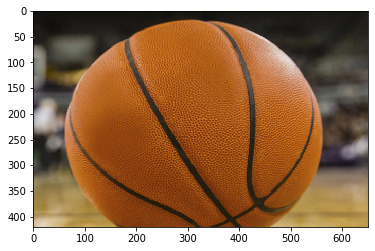

In [164]:
plt.imshow(pro_image.crop((min(fle),min(fup),max(fri),max(flo))))